**Pandas基础**  

In [1]:
import pandas as pd
import numpy as np

# 1.Series基础

## 1.1 创建Series

### 方法1: 由`列表(数组)`创建

In [9]:
"""
^ 指定显式索引为字符串的series
"""
pd.Series([83, 68], index=["bob", "alice"], name="weights")

bob      83
alice    68
Name: weights, dtype: int64

In [10]:
"""
^ 指定显式索引为数字的series
"""
pd.Series([3, 4, 5], index=[100, 200, 300])  # * data可以是一个数（标量），这时会重复到每个索引

100    3
200    4
300    5
dtype: int64

### 方法2: 由`字典`创建

In [11]:
pd.Series({2:'a', 1:'b', 3:'c'})  # * index与字典键一致

2    a
1    b
3    c
dtype: object

In [12]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[1, 3])  # ! 可以通过指定索引的方式筛选需要的结果

1    b
3    c
dtype: object

## 1.2 索引与切片


### 1.2.1 显式与隐式索引  
Series可以看成是可以自定义索引的数组

In [13]:
ls = [0.25, 0.5, 0.75, 1.0]

ar = np.array(ls)
ar  # * 创建一个numpy数组
ar[0] # ^ 回顾numpy数组通过`隐式索引`来获取数值

data = pd.Series(ls)
data  # * 转换成Series
data[0]  # ^ Series用显式定义的索引与数值关联，默认是整数索引

data = pd.Series(ls, index=['a', 'b', 'c', 'd'])  # ^ Series的索引可以自定义
data
data['c']
data[2]

0.75

### 1.2.2 index筛选行

In [14]:
"""
^ 创建示例Series
"""
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

#### 方法1: 双方括号指定index

In [15]:
data[['a', 'c']]  # * 双方括号指定索引（花哨的索引）

a    0.25
c    0.75
dtype: float64

#### 方法2: bool数组筛选

In [16]:
data > 0.3  # * 返回满足条件的bool数组
data < 0.8
(data > 0.3) & (data < 0.8)  # * bool数组的集合运算
data[(data > 0.3) & (data < 0.8)]  # * 使用bool筛选数据

b    0.50
c    0.75
dtype: float64

#### 方法3: loc/iloc属性
* 如果显式索引正好是整数，这样就会与默认的隐式整数索引混淆
* `为了避免造成混乱，pandas提供了索引器进行索引`

In [17]:
"""
^ 创建示例Series
"""
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])

##### 对显式index索引: loc属性

In [18]:
data
data.loc[1]
data.loc[1:4]

1    a
3    b
dtype: object

##### 对隐式index索引: iloc属性
`从0开始，左闭右开`

In [19]:
data
data.iloc[0]
data.iloc[0:2]

1    a
3    b
dtype: object

### 1.2.3 切片  

In [20]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data
data['a':'c']  # * 利用显式索引切片
data[0:2]  # * 利用整数隐式索引切片
# ! 注意！！显式索引包含最后一个，而隐式索引不包含最后一个
data[['a', 'c']]  # * 双方括号指定索引（花哨的索引）


a    0.25
c    0.75
dtype: float64

## 1.3 常用操作

In [21]:
"""
^ 创建示例Series
"""
population_dict = {
    'California': 928465828,
    'Texas': 2634657823,
    'New York': 1962738924,
    'Florida': 19665237,
    'Illinois': 12882135
    }
population_dict # * 创建一个字典

# ^ 将字典转换成series
population_series = pd.Series(population_dict)
population_series

California     928465828
Texas         2634657823
New York      1962738924
Florida         19665237
Illinois        12882135
dtype: int64

### 查看index: `index`属性

In [22]:
population_series  # * 示例series
population_series.index
list(population_series.index)  # * 返回index的列表

['California', 'Texas', 'New York', 'Florida', 'Illinois']

### Series转换成数组：`values`属性

In [23]:
# values属性：将Series对象中的数据转成Numpy数组
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data)

d = data.values
print(d)
type(d)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
[0.25 0.5  0.75 1.  ]


numpy.ndarray

### Series转换成字典: `items`方法

In [24]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data
dict(data.items())

{0: 0.25, 1: 0.5, 2: 0.75, 3: 1.0}

***
# 2.DataFrame基础
* DataFrame是既有行索引又有列名的二维数组
* 也可以看作：拥有共同行索引的多个Series对象的组合

## 2.1 创建DataFrame

### ​方法1: 由`列表(数组)`创建 (最直接的方法)

In [25]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
data  # * 创建一个二维数组
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )
people.dtypes  # * 输出每列数据的类型
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


### ​方法2: 由`Series`创建

In [26]:
# no.1
population_dict = {
    'California': 928465828,
    'Texas': 2634657823,
    'New York': 1962738924,
    'Florida': 19665237,
    'Illinois': 12882135
    }
population = pd.Series(population_dict)

# ^ 通过Series对象创建
df1 = pd.DataFrame(population, columns=['population'])
df1

,population
California,928465828
Texas,2634657823
New York,1962738924
Florida,19665237
Illinois,12882135


### ​方法3: 由`字典`的列表创建 (基本元素是行)

In [2]:
data = [{'a':1, 'b':2}, {'a':3, 'b':5}]
data # * 生成字典data

df2 = pd.DataFrame(data)
df2

,a,b
0,1,2
1,3,5


In [28]:
"""
^ 出现缺失值
"""
pd.DataFrame([{'a':1, 'b':2}, {'b':3, 'c':5}])  # ! 缺失值会用`Not a Number`占位

,a,b,c
0,1.0,2,NaN
1,NaN,3,5.0


### ​方法4: 由`series的字典`创建 (基本元素是列)

In [29]:
"""
^ 示例1
"""
population_dict = {
    'California': 928465828,
    'Texas': 2634657823,
    'New York': 1962738924,
    'Florida': 19665237,
    'Illinois': 12882135
    }
population = pd.Series(population_dict) # * 创建第一个Series: population

area_dict = {
    'California': 423853,
    'Texas': 6928374,
    'New York': 14184736, 
    'Florida': 1702844, 
    'Illinois': 1599923764
}
area = pd.Series(area_dict)  # * 创建第二个Series: aera

print(type(population))
print(type(area))
states = pd.DataFrame({'population':population, 'area':area})  # * 创建df
states
type(states['area'])
"""
Dataframe是特殊的字典  
    普通的字典: 一个key映射到一个value  
    Dataframe: 一个列名映射到一列数据(Series对象)
"""

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


'\nDataframe是特殊的字典  \n    普通的字典: 一个key映射到一个value  \n    Dataframe: 一个列名映射到一列数据(Series对象)\n'

In [30]:
"""
^ 示例2
"""
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}  # * 创建一个series的字典

people = pd.DataFrame(people_dict)
people
# ! 生成的Df会自动根据Series的索引对齐，缺失值将用NaN补齐
# ! Series的名字将自动忽略


,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


### 逆操作: DataFrame转换成数组: values属性

In [31]:
people
people.values

array([[68, 1985, nan, 'Biking'],
       [83, 1984, 3.0, 'Dancing'],
       [112, 1992, 0.0, nan]], dtype=object)

## 2.2 index操作

In [32]:
"""
^ 生成一个试验的states
"""
population_dict = {
    'California': 928465828,
    'Texas': 2634657823,
    'New York': 1962738924,
    'Florida': 19665237,
    'Illinois': 12882135
    }
population = pd.Series(population_dict)

area_dict = {
    'California': 423853,
    'Texas': 6928374,
    'New York': 14184736, 
    'Florida': 1702844, 
    'Illinois': 1599923764
}
area = pd.Series(area_dict)

# * 给上面两个Series赋予列名，生成dataframe
states = pd.DataFrame({'area': area, 'population': population})
states

,area,population
California,423853,928465828
Texas,6928374,2634657823
New York,14184736,1962738924
Florida,1702844,19665237
Illinois,1599923764,12882135


### ​2.2.1 查看index: `index`属性

In [33]:
states.index  # * 查看行索引

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

### 2.2.2 重置index: `reset_index`方法

In [34]:
df1 = pd.DataFrame([[1, 2], [3, 4]])
df2 = pd.DataFrame([[1, 2], [3, 4]])
df = pd.concat([df1, df2])
df # * 合并df后索引保持原样，经常需要重置索引

df = df.reset_index(drop=True)
df

,0,1
0,1,2
1,3,4
2,1,2
3,3,4


## 2.3 列操作

### 2.3.1 查看columns: columns属性

In [35]:
states.columns  # ^ 查看列名
states.columns.values  # ^ 如果显示不全，使用此用法

array(['area', 'population'], dtype=object)

### 2.3.2 修改columns: rename方法或直接赋值

In [36]:
a = pd.DataFrame({'A':[1,2,3], 'B':[4,5,6], 'C':[7,8,9]})
a
# ^ 方法1: rename方法
a.rename(columns={
    'A': 'a', 
    'B': 'b', 
    'C': 'c'
}, inplace=True)
a
# ^ 方法2: 直接赋值改全部
a.columns = ['A', 'B', 'C']
a

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


### 2.3.3 添加columns

#### 方法1: 直接赋值

In [37]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )

people
people['age'] = 2022 - people["birthyear"] # * 添加新列
people['over 30'] = people["age"] > 35 # * 添加一个布尔列
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people
# ! series中缺失的index则用NaN，多出来的则自动忽略

,birthyear,children,hobby,weight,age,over 30,pets
alice,1985,NaN,Biking,68,37,True,NaN
bob,1984,3.0,Dancing,83,38,True,0.0
charles,1992,0.0,NaN,112,30,False,5.0


#### 方法2: 指定位置插入列: insert方法

In [38]:
people
people.insert(1, "height", [172, 181, 185])
people

,birthyear,height,children,hobby,weight,age,over 30,pets
alice,1985,172,NaN,Biking,68,37,True,NaN
bob,1984,181,3.0,Dancing,83,38,True,0.0
charles,1992,185,0.0,NaN,112,30,False,5.0


#### 方法3: 添加列并创建新的副本: assign方法

In [39]:
people
people_new = people.assign(
    body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2, 
    overweight = lambda df: df["body_mass_index"] > 25
)
people_new
people

,birthyear,height,children,hobby,weight,age,over 30,pets
alice,1985,172,NaN,Biking,68,37,True,NaN
bob,1984,181,3.0,Dancing,83,38,True,0.0
charles,1992,185,0.0,NaN,112,30,False,5.0


#### 方法4: 计算表达式并替换: eval方法

In [40]:
people.eval("body_mass_index = weight / (height/100) ** 2")  # * 默认inplace=False
people

people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

# ^ 使用@引用变量
overweight_threshold = 30 
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,birthyear,height,children,hobby,weight,age,over 30,pets,body_mass_index,overweight
alice,1985,172,NaN,Biking,68,37,True,NaN,22.985398,False
bob,1984,181,3.0,Dancing,83,38,True,0.0,25.335002,False
charles,1992,185,0.0,NaN,112,30,False,5.0,32.724617,True


### 2.3.4 移除columns: pop函数  

In [41]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )
people

birthyears = people.pop("birthyear")  # * 移除的一列赋值新的变量

birthyears
people

,children,hobby,weight
alice,NaN,Biking,68
bob,3.0,Dancing,83
charles,0.0,NaN,112


### 2.3.5 删除columns

#### 方法1: del命令

In [42]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )
people

del people['children']  # * 立即生效
people

,birthyear,hobby,weight
alice,1985,Biking,68
bob,1984,Dancing,83
charles,1992,NaN,112


#### 方法2: drop方法

In [43]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )
people
people.drop(columns=['hobby', 'weight'])

,birthyear,children
alice,1985,NaN
bob,1984,3.0
charles,1992,0.0


## 2.4 排序: sort_index/values方法
* 默认升序
* 默认按行排序

In [44]:
"""
^ 示例df
"""
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )
people['age'] = 2022 - people["birthyear"] # * 添加新列
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people

,birthyear,children,hobby,weight,age,pets
alice,1985,NaN,Biking,68,37,NaN
bob,1984,3.0,Dancing,83,38,0.0
charles,1992,0.0,NaN,112,30,5.0


### 2.4.1 按index排序

In [45]:
people.sort_index(ascending=False) # * 降序排列，默认升序

,birthyear,children,hobby,weight,age,pets
charles,1992,0.0,NaN,112,30,5.0
bob,1984,3.0,Dancing,83,38,0.0
alice,1985,NaN,Biking,68,37,NaN


### 2.4.2 按columns排序

In [46]:
people
people.sort_index(axis=1, inplace=True)
people

,age,birthyear,children,hobby,pets,weight
alice,37,1985,NaN,Biking,NaN,68
bob,38,1984,3.0,Dancing,0.0,83
charles,30,1992,0.0,NaN,5.0,112


### 2.4.3 按某一列的数值排序

In [47]:
people.sort_values(by='age', ascending=False)

,age,birthyear,children,hobby,pets,weight
bob,38,1984,3.0,Dancing,0.0,83
alice,37,1985,NaN,Biking,NaN,68
charles,30,1992,0.0,NaN,5.0,112


---
# 3.Index对象

## 3.1 创建Index对象
* Index对象的很多操作都像数组
* 但是不能通过索引赋值

In [48]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [49]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [50]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [51]:
# ind[0] = 1  # ! Index对象的索引是不可变的，这个设计的目的是避免因修改索引时的粗心大意而导致错误

## 3.2 index对象的集合运算
* Index对象可实现集合的运算

In [52]:
indA = pd.Index([1, 3, 5, 7, 9])  # * 创建indexA
indB = pd.Index([2, 3, 5, 7, 11])  # * 创建indexB

indA & indB  # * 交集
indA | indB  # * 并集
indA ^ indB  # * 异或 = 并集 - 交集

/var/folders/fz/b935cghx795_zycx9njnpf3m0000gn/T/ipykernel_96427/94529917.py:4: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  indA & indB  # * 交集
/var/folders/fz/b935cghx795_zycx9njnpf3m0000gn/T/ipykernel_96427/94529917.py:5: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  indA | indB  # * 并集
/var/folders/fz/b935cghx795_zycx9njnpf3m0000gn/T/ipykernel_96427/94529917.py:6: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  indA ^ indB  # * 异或 = 并集 - 交集


Int64Index([1, 2, 9, 11], dtype='int64')

---
# 4.多级索引的DataFrame  
* 行索引和列索引都可以创建成多级索引
* 只需将集合中的键值对的键写成元组的形式

## 4.1 创建多级索引的DataFrame

In [53]:
df = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
df
df["public"]
df["public", "birthyear"]

Paris   alice      1985
        bob        1984
London  charles    1992
Name: (public, birthyear), dtype: int64

## 4.2 删除多级索引中的某一级: `droplevel`方法

In [54]:
# * 多索引DF的dropping a level
d1 = df.copy()
d1.columns = d1.columns.droplevel(level=0) # * 将列索引的0级删去
d1.index = d1.index.droplevel(level=1) # * 将行索引的1级删去
d1

,birthyear,hobby,weight,children
Paris,1985,Biking,68,NaN
Paris,1984,Dancing,83,3.0
London,1992,NaN,112,0.0


## 4.3 行列索引的移动:`stacking/unstacking`方法

In [55]:
df2 = df.T
df2

df3 = df2.stack() # * 将`列索引`的最底层stack到`行索引`的最底层
df3

df4 = df3.unstack() # * 将`行索引`的最底层stack到`列索引`的最底层
df4 # ! 此操作并未还原成原样

# ^ 指定level
df5 = df4.stack(level=0)
df5
df6 = df5.unstack(level=(0, 2))
df6

alice                          bob                       charles  \
          private       public         private       public          private   
           London Paris London   Paris  London Paris London    Paris  London   
birthyear     NaN   NaN    NaN    1985     NaN   NaN    NaN     1984     NaN   
children      NaN   NaN    NaN     NaN     NaN   3.0    NaN      NaN     0.0   
hobby         NaN   NaN    NaN  Biking     NaN   NaN    NaN  Dancing     NaN   
weight        NaN    68    NaN     NaN     NaN    83    NaN      NaN     112   

                              
                public        
          Paris London Paris  
birthyear   NaN   1992   NaN  
children    NaN    NaN   NaN  
hobby       NaN    NaN   NaN  
weight      NaN    NaN   NaN

---
# 5.数据筛选

In [56]:
"""
^ 创建示例df
"""
states = pd.DataFrame({'area': area, 'population': population})
states["num"] = [1, 2, 3, 4, 5]
states

,area,population,num
California,423853,928465828,1
Texas,6928374,2634657823,2
New York,14184736,1962738924,3
Florida,1702844,19665237,4
Illinois,1599923764,12882135,5


## 5.1 筛选行

### 方法1: bool数组筛选行

In [57]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )

people
people[np.array([True, False, True])]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
charles,1992,0.0,NaN,112


### 方法2: 条件筛选行

In [58]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )

people
people[people["birthyear"] < 1990]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83


## 5.2 筛选列

In [59]:
"""
^ 对列名进行字典形式的索引
"""
states
states['area']  # * 索引1列
states.area  # * 索引1列
states[["area", "num"]]  # * 双方括号索引多个columns

,area,num
California,423853,1
Texas,6928374,2
New York,14184736,3
Florida,1702844,4
Illinois,1599923764,5


## 5.3 索引器：`loc/iloc`属性  
* 行列都可以索引
* 格式: 先行后列

### 5.3.1 显式索引器: `loc`属性

In [60]:
states
states.loc['California': 'Florida', 'area': 'population']

,area,population
California,423853,928465828
Texas,6928374,2634657823
New York,14184736,1962738924
Florida,1702844,19665237


### 5.3.2 隐式索引器: `iloc`属性

In [61]:
states
states.iloc[:2, :1]

,area
California,423853
Texas,6928374


### 5.3.3 使用`loc`进行条件筛选

In [62]:
states
states.loc[states.area > 7000000, ['area', 'population']]

,area,population
New York,14184736,1962738924
Illinois,1599923764,12882135


## 5.4 数据查询: `query`方法

In [63]:
data = [
    [1985, np.nan, "Biking", 68], 
    [1984, 3.0, "Dancing", 83], 
    [1992, 0, np.nan, 112]
]
people = pd.DataFrame(
    data, 
    columns=['birthyear', 'children', 'hobby', 'weight'],
    index=["alice", "bob", "charles"], 
    )
people['age'] = 2022 - people["birthyear"] # * 添加新列
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people

people.query("age > 30 and pets == 0")

,birthyear,children,hobby,weight,age,pets
bob,1984,3.0,Dancing,83,38,0.0


---
# 6.合并数据集

## 6.1 连接: concat函数

In [64]:
"""
^ 创建示例df
"""
def make_df(col_names, index):
    ''' # ^ 为了便于示范，创建一个DataFrame生成器 '''
    data = {c: [str(c) + str(i) for i in index] for c in col_names}
    return pd.DataFrame(data, index)

make_df('ABC', range(3))

"""
^ 两个示例df
"""
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_loc
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


### 6.1.1 连接Series

In [65]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

### 6.1.2 连接DataFrame
* concat函数不重置索引

In [66]:
df1 = make_df('AB', [0, 1])
df2 = make_df('AB', [0, 1])
df3 = make_df('CD', [0, 2])

df1
df2
df3

pd.concat([df1, df2]) # * 连同显式索引直接竖着拼接, 即使索引重复也会保留索引

,A,B
0,A0,B0
1,A1,B1
0,A0,B0
1,A1,B1


### 6.1.3 横向连接: `axis=1`

In [67]:
pd.concat([df1, df2, df3], axis=1)  # * 横向拼接


,A,B,A,B,C,D
0,A0,B0,A0,B0,C0,D0
1,A1,B1,A1,B1,NaN,NaN
2,NaN,NaN,NaN,NaN,C2,D2


### 6.1.4 重置索引: `ignore_index=True`

In [68]:
# ! 注意到默认的concat没有改变索引，可能会有相同索引的行
pd.concat([df1, df2], ignore_index=True)  # * 重置索引

,A,B
0,A0,B0
1,A1,B1
2,A0,B0
3,A1,B1


### 6.1.5 连接后只保留交集列: `join="inner"`

In [69]:
pd.concat([city_loc, city_pop], join="inner")

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


## 6.2 合并: merge函数

In [70]:
"""
两个示例df
"""
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_loc
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


### 6.2.1 指定共有的一列, 合并两表

In [71]:
pd.merge(left=city_loc, right=city_pop, on="city")
"""
! 注意:
因为两个df都有相同的列名state, 因此输出的df中有state_x和state_y
on参数设置了按"city"并合, 只保留city列有交集的行
"""

'\n! 注意:\n因为两个df都有相同的列名state, 因此输出的df中有state_x和state_y\non参数设置了按"city"并合, 只保留city列有交集的行\n'

### 6.2.2 指定保留范围: `how`参数
* 默认取交集

In [72]:
print('pd.merge(left=city_loc, right=city_pop, on="city", how="outer")')
pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
# * 保留两个df所有行

print('pd.merge(left=city_loc, right=city_pop, on="city", how="left")')
pd.merge(left=city_loc, right=city_pop, on="city", how="left")
# * 保留left所有

print('pd.merge(left=city_loc, right=city_pop, on="city", how="right")')
pd.merge(left=city_loc, right=city_pop, on="city", how="right")
# * 保留right所有

pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
pd.merge(left=city_loc, right=city_pop, on="city", how="left")
pd.merge(left=city_loc, right=city_pop, on="city", how="right")


,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


### 6.2.3 当指定的一列在两表中的名称不同时

In [73]:
city_pop.columns = ["population", "name", "state"]
city_loc
city_pop
pd.merge(left=city_loc, right=city_pop, left_on="city", right_on="name")

,state_x,city,lat,lng,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


## 6.3 添加: `append`方法

In [74]:
city_loc
city_pop
city_loc.append(city_pop)

/var/folders/fz/b935cghx795_zycx9njnpf3m0000gn/T/ipykernel_96427/3781284294.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city_loc.append(city_pop)


,state,city,lat,lng,population,name
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
3,California,NaN,NaN,NaN,808976.0,San Francisco
4,New-York,NaN,NaN,NaN,8363710.0,New York
5,Florida,NaN,NaN,NaN,413201.0,Miami
6,Texas,NaN,NaN,NaN,2242193.0,Houston


---
# 7.缺失值处理  
[参考网址](https://blog.csdn.net/xiaoxiaosuwy/article/details/81187694)

In [75]:
"""
^ 构造一个有缺失值的df, 作为示例
"""
df_1 = pd.DataFrame([[0, 1], [1, 2]], columns=['col1', 'col2'])
df_2 = pd.DataFrame([[0, 1, 2], [1, 2, 3]], columns=['col1', 'col2', 'col3'])
df = pd.concat([df_1, df_2])  # * 构造出一个有缺失值的df
df_1
df_2
df

,col1,col2,col3
0,0,1,NaN
1,1,2,NaN
0,0,1,2.0
1,1,2,3.0


## 7.1 替换异常值为NaN: `fillna`函数

In [76]:
df.fillna(9999)
df

,col1,col2,col3
0,0,1,NaN
1,1,2,NaN
0,0,1,2.0
1,1,2,3.0


## 7.2 判断数据是否为缺失值: `isnull`函数  
缺失值为True

In [77]:
df.isnull()
df.isnull().any()  # * 一列全假则假, 有真则真

col1    False
col2    False
col3     True
dtype: bool

## 7.3 删除缺失值所在行列: `dropna`函数

In [78]:
df1 = df.copy()
df1
df1.dropna(how="all") # * 行/列全部是NaN时，删除行/列
df1.dropna(how="any") # * 删除有NaN的行
df1.dropna(axis=0, how="any") # * 按行删除
df1.dropna(axis=1, how="any") # * 按列删除

,col1,col2
0,0,1
1,1,2
0,0,1
1,1,2


---
# 8.处理大数据

In [79]:
"""
^ 生成大数据示例df
"""
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0


## 8.1 浏览前5行: `head`方法

In [80]:
large_df.head()
large_df.head(n=10)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
5,55.0,66.0,99.0,Blabla,154.0,44.0,143.0,77.0,33.0,11.0,...,66.0,55.0,66.0,99.0,154.0,44.0,143.0,77.0,33.0,11.0
6,66.0,77.0,110.0,Blabla,165.0,55.0,154.0,88.0,44.0,22.0,...,77.0,66.0,77.0,110.0,165.0,55.0,154.0,88.0,44.0,22.0
7,77.0,88.0,121.0,Blabla,NaN,66.0,165.0,99.0,55.0,33.0,...,88.0,77.0,88.0,121.0,NaN,66.0,165.0,99.0,55.0,33.0
8,88.0,99.0,132.0,Blabla,NaN,77.0,NaN,110.0,66.0,44.0,...,99.0,88.0,99.0,132.0,NaN,77.0,NaN,110.0,66.0,44.0
9,99.0,110.0,143.0,Blabla,11.0,88.0,NaN,121.0,77.0,55.0,...,110.0,99.0,110.0,143.0,11.0,88.0,NaN,121.0,77.0,55.0


## 8.2 浏览后5行: `tail`方法

In [81]:
large_df.tail()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


## 8.3 显示每列的统计信息和内存占用: `info`方法

In [82]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          8823 non-null   float64
 1   B          8824 non-null   float64
 2   C          8824 non-null   float64
 3   some_text  10000 non-null  object 
 4   D          8824 non-null   float64
 5   E          8822 non-null   float64
 6   F          8824 non-null   float64
 7   G          8824 non-null   float64
 8   H          8822 non-null   float64
 9   I          8823 non-null   float64
 10  J          8823 non-null   float64
 11  K          8822 non-null   float64
 12  L          8824 non-null   float64
 13  M          8824 non-null   float64
 14  N          8822 non-null   float64
 15  O          8824 non-null   float64
 16  P          8824 non-null   float64
 17  Q          8824 non-null   float64
 18  R          8823 non-null   float64
 19  S          8824 non-null   float64
 20  T      

## 8.4 显示每列的统计信息: `describe`方法
* `count`: number of non-null (not NaN) values
* `mean`: mean of non-null values
* `std`: [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of non-null values
* `min`: minimum of non-null values
* `25%`, `50%`, `75%`: 25th, 50th and 75th [percentile](https://en.wikipedia.org/wiki/Percentile) of non-null values
* `max`: maximum of non-null values

In [83]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


---
# 9.保存与加载  
[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

In [84]:
"""
^ 示例df
"""
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby","weight","birthyear","children"],
    index=["alice", "bob"]
)
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


## 9.1 保存文件

In [85]:
my_df.to_csv("./output/my_df.csv")
my_df.to_html("./output/my_df.html")
my_df.to_json("./output/my_df.json")
my_df.to_excel("./output/my_df.xlsx", sheet_name='People')

## 9.2 载入数据

In [86]:
my_df_loaded = pd.read_csv("./output/my_df.csv", index_col=0)
my_df_loaded_err = pd.read_csv("./output/my_df.csv")
my_df_loaded
my_df_loaded_err # ! 注意不指定index的后果

,Unnamed: 0,hobby,weight,birthyear,children
0,alice,Biking,68.5,1985,NaN
1,bob,Dancing,83.1,1984,3.0


---

# 实用技巧  


1. 默认索引，隐式和显式绑定；有定制显式索引的Series，隐式索引始终从0开始

In [87]:
s = pd.Series([2, 666, 777, 999], index=['a', 's', 'd', 'f'])
s
s[0]
s1 = s[1:]
s1
s1[0]

666

In [88]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise
surprise_slice = surprise[2:]
surprise_slice
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)
surprise_slice[2]

Key error: 0


1002

2. 两个Series相加：相同index的直接相加，分别自己有的index用NaN填充

In [89]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'e', 'd'])
s1
s2
s1 + s2

a    2.0
b    4.0
c    NaN
d    8.0
e    NaN
dtype: float64

3. 快速画图  
pandas有丰富的快速画图功能，详情见[官方文档](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

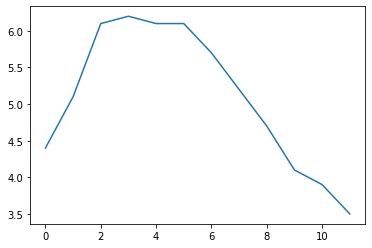

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

4. `groupby()`分组操作

In [91]:
# 创建一个用于实验的df
data = [[8.0, 8.0, 9.0, np.nan, 'Biking'],
       [10.0, 9.0, 10.0, np.nan, 'Dancing'],
       [4.0, 11.0, 5.0, np.nan, np.nan],
       [np.nan, np.nan, np.nan, np.nan, 'Dancing'],
       [9.0, 10.0, 11.0, np.nan, 'Biking']]
index = ['alice', 'bob', 'charles', 'colin', 'darwin']
cols = ['sep', 'oct', 'nov', 'dec', 'hobby']
final_grades = pd.DataFrame(data, index=index, columns=cols)
final_grades

grouped_grades = final_grades.groupby("hobby")
grouped_grades # * groupby之后的类型是DataFrameGroupBy，而非df

grouped_grades.mean() # ! 对DataFrameGroupBy执行统计操作, 注意NaN自动忽略

,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.0,10.0,NaN
Dancing,10.0,9.0,10.0,NaN
